In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlinescd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import matplotlib.patches as patches
from collections import Counter
from scipy.signal import find_peaks
from tqdm.notebook import tqdm
from multiprocessing import Pool
import re
import os
from functools import partial
from scipy.stats import ks_2samp
from scipy.stats import fisher_exact
os.chdir('for_pub/Figure_2')
from Figure_2_module import *

/home/pb/anaconda3/envs/R_python/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
results_a_vs_c_splice = load_csv_as_dataframe('data_files/results_a_vs_c_splice.csv')
results_b_vs_d_splice = load_csv_as_dataframe('data_files/results_b_vs_d_splice.csv')

#load the AS event data table
asevents = pd.read_csv("data_files/ASevents_ovary.csv",sep="\t")
asevents.set_index('ids', inplace=True)

#merge the as events with the baysian table
splice_abundace_a_vs_c = pd.merge(results_a_vs_c_splice,asevents,left_index=True,right_index=True)
splice_abundace_b_vs_d = pd.merge(results_b_vs_d_splice,asevents,left_index=True,right_index=True)

#calculate the inclusion and exclusion event numbers
splice_abundace_a_vs_c = calculate_and_add_splicing_events(splice_abundace_a_vs_c)
splice_abundace_b_vs_d = calculate_and_add_splicing_events(splice_abundace_b_vs_d)

# Load the GTF file

gtf_file_path = 'data_files/all.flair.collapse.isoforms.gtf'

#gtf_file_path = '../../COC_nanopore/flair/all.flair.collapse.isoforms.gtf'
gtf_data = pd.read_csv(gtf_file_path, sep="\t",comment="#", low_memory=False)

# Assigning column names as per GTF format specification
gtf_columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
gtf_data.columns = gtf_columns

# Extracting gene and transcript information
gtf_data['gene_id'] = gtf_data['attribute'].str.extract('gene_id "([^"]+)"')
gtf_data['transcript_id'] = gtf_data['attribute'].str.extract('transcript_id "([^"]+)"')

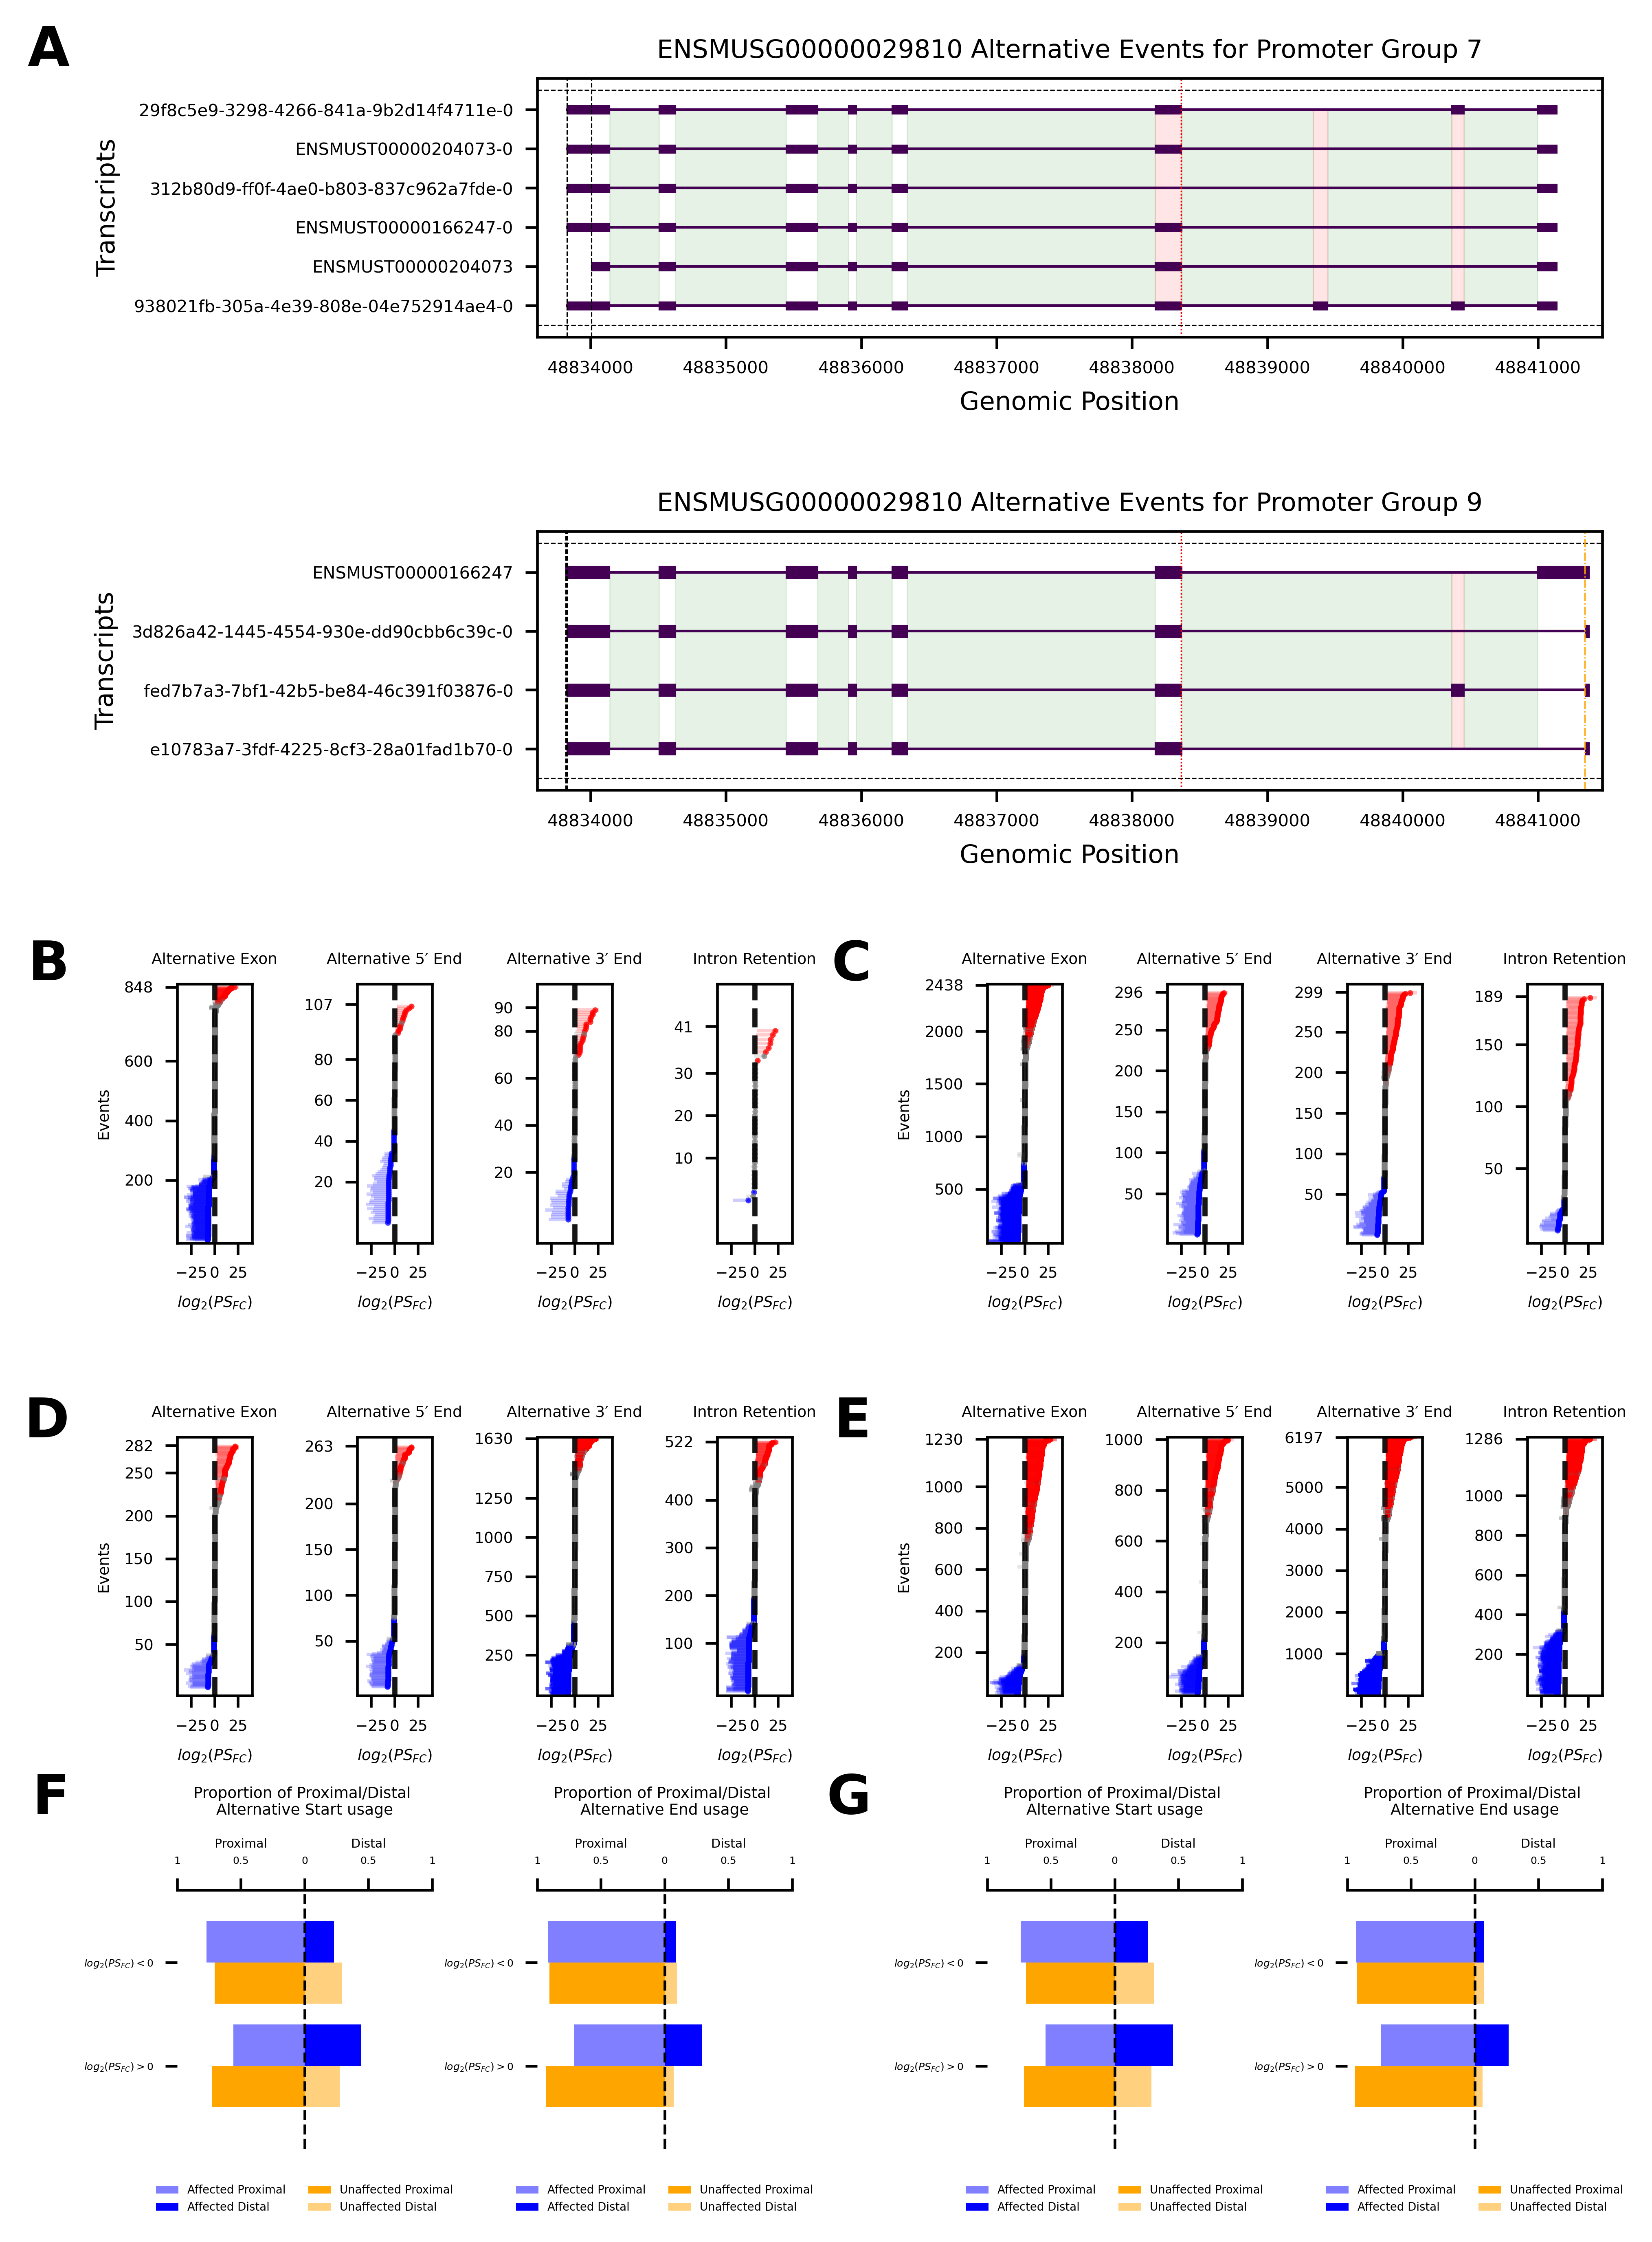

In [3]:
#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=.7, hspace=.7)
plt.rcParams['font.family'] = 'sans-serif'

# Prioritize 'Arial' within the 'sans-serif' font list
plt.rcParams['font.sans-serif'] = ['Arial'] + plt.rcParams['font.sans-serif']

#turn on mathtext
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(8,11),dpi=600)

# Create a GridSpec with 2 rows of different heights and 2 columns
gs = gridspec.GridSpec(5, 17, height_ratios=[1,1,1,1,1], hspace=.75,wspace=.2, figure=fig)  # Example: [4, 1, 2] for 3 rows


# First row - two plots, each spanning two columns
ax1_1 = fig.add_subplot(gs[0, 4:16])
ax1_2 = fig.add_subplot(gs[1, 4:16])

ax1 = fig.add_subplot(gs[2, 0:1]) # These create four subplots on the second row,
ax2 = fig.add_subplot(gs[2, 2:3]) # each in its individual column.
ax3 = fig.add_subplot(gs[2, 4:5])
ax4 = fig.add_subplot(gs[2, 6:7])


# third row - four plots, each in its own column
ax5 = fig.add_subplot(gs[2, 9:10]) # These create four subplots on the second row,
ax6 = fig.add_subplot(gs[2, 11:12]) # each in its individual column.
ax7 = fig.add_subplot(gs[2, 13:14])
ax8 = fig.add_subplot(gs[2, 15:16])

ax1_3 = fig.add_subplot(gs[3, 0:1]) # These create four subplots on the second row,
ax2_1 = fig.add_subplot(gs[3, 2:3]) # each in its individual column.
ax3_1 = fig.add_subplot(gs[3, 4:5])
ax4_1 = fig.add_subplot(gs[3, 6:7])


# third row - four plots, each in its own column
ax5_1 = fig.add_subplot(gs[3, 9:10]) # These create four subplots on the second row,
ax6_1 = fig.add_subplot(gs[3, 11:12]) # each in its individual column.
ax7_1 = fig.add_subplot(gs[3, 13:14])
ax8_1 = fig.add_subplot(gs[3, 15:16])

# third row
ax13 = fig.add_subplot(gs[4,0:3])
ax14 = fig.add_subplot(gs[4,4:7])

ax15 = fig.add_subplot(gs[4,9:12])
ax16 = fig.add_subplot(gs[4,13:16])


gene_id ='ENSMUSG00000029810'

transcript_data, labeled_gtf_data, promoter_group_data = get_splicing_events_V5(gtf_data,gene_id)

promoter_group_id_to_plot = 7 
promoter_group_id_to_plot_2 = 9

plot_promoter_group(
    promoter_group_data=promoter_group_data,
    promoter_group_id_to_plot=promoter_group_id_to_plot,
    gtf_data=gtf_data,
    gene_id=gene_id,
    ax_ae=ax1_1,       # Plot alternative events on ax1
    ax_cov=None,      # Plot coverage on ax2
    asplot=True,
    covplot=False,
    fscale1=5,
    fscale2=10,
    hide_xticks=True
)

 
plot_promoter_group(
    promoter_group_data=promoter_group_data,
    promoter_group_id_to_plot=promoter_group_id_to_plot_2,
    gtf_data=gtf_data,
    gene_id=gene_id,
    ax_ae=ax1_2,       # Plot alternative events on ax1
    ax_cov=None,      # Plot coverage on ax2
    asplot=True,
    covplot=False,
    fscale1=5,
    fscale2=10,
    hide_xticks=True
)
#create_splicetype_plot(splice_abundace_a_vs_c, ax1,"Alternative First Exon","ap",xlab=False)
create_splicetype_plot(splice_abundace_a_vs_c, ax1,"Alternative Exon","ce", "I","6weekvs14month_PMSG_Fig2B",xlab=True,ylab=True,export=True,base_size=6)
create_splicetype_plot(splice_abundace_a_vs_c, ax2,"Alternative 5′ End","a5", "I","6weekvs14month_PMSG_Fig2B",xlab=True,ylab=False,export=True,base_size=6)
create_splicetype_plot(splice_abundace_a_vs_c, ax3,"Alternative 3′ End","a3","I", "6weekvs14month_PMSG_Fig2B",xlab=True,ylab=False,export=True,base_size=6)
create_splicetype_plot(splice_abundace_a_vs_c, ax4,"Intron Retention","i", "I","6weekvs14month_PMSG_Fig2B",xlab=True,ylab=False,export=True,base_size=6)
#create_splicetype_plot(splice_abundace_a_vs_c, ax6,"Alternative Last Exon","ae",xlab=False,ylab=False)

#create_splicetype_plot(splice_abundace_b_vs_d, ax7,"","ap")
create_splicetype_plot(splice_abundace_b_vs_d, ax5,"Alternative Exon","ce", "I","6weekvs14month_PMSG+hCG_Fig2C",ylab=True,export=True,base_size=6)
create_splicetype_plot(splice_abundace_b_vs_d, ax6,"Alternative 5′ End","a5","I", "6weekvs14month_PMSG+hCG_Fig2C",ylab=False,export=True,base_size=6)
create_splicetype_plot(splice_abundace_b_vs_d, ax7,"Alternative 3′ End","a3","I", "6weekvs14month_PMSG+hCG_Fig2C",ylab=False,export=True,base_size=6)
create_splicetype_plot(splice_abundace_b_vs_d, ax8,"Intron Retention","i","I", "6weekvs14month_PMSG+hCG_Fig2C",ylab=False,export=True,base_size=6)
#create_splicetype_plot(splice_abundace_b_vs_d, ax12,"","ae",ylab=False)

#create_splicetype_plot(splice_abundace_a_vs_c, ax1,"Alternative First Exon","ap",xlab=False)
create_splicetype_plot(splice_abundace_a_vs_c, ax1_3,"Alternative Exon","ce", "E","6weekvs14month_PMSG_Fig2D",xlab=True,ylab=True,export=True,base_size=6)
create_splicetype_plot(splice_abundace_a_vs_c, ax2_1,"Alternative 5′ End","a5", "E","6weekvs14month_PMSG_Fig2D",xlab=True,ylab=False,export=True,base_size=6)
create_splicetype_plot(splice_abundace_a_vs_c, ax3_1,"Alternative 3′ End","a3","E", "6weekvs14month_PMSG_Fig2D",xlab=True,ylab=False,export=True,base_size=6)
create_splicetype_plot(splice_abundace_a_vs_c, ax4_1,"Intron Retention","i", "E","6weekvs14month_PMSG_Fig2D",xlab=True,ylab=False,export=True,base_size=6)
#create_splicetype_plot(splice_abundace_a_vs_c, ax6,"Alternative Last Exon","ae",xlab=False,ylab=False)

#create_splicetype_plot(splice_abundace_b_vs_d, ax7,"","ap")
create_splicetype_plot(splice_abundace_b_vs_d, ax5_1,"Alternative Exon","ce", "E","6weekvs14month_PMSG+hCG_Fig2E",ylab=True,export=True,base_size=6)
create_splicetype_plot(splice_abundace_b_vs_d, ax6_1,"Alternative 5′ End","a5","E", "6weekvs14month_PMSG+hCG_Fig2E",ylab=False,export=True,base_size=6)
create_splicetype_plot(splice_abundace_b_vs_d, ax7_1,"Alternative 3′ End","a3","E", "6weekvs14month_PMSG+hCG_Fig2E",ylab=False,export=True,base_size=6)
create_splicetype_plot(splice_abundace_b_vs_d, ax8_1,"Intron Retention","i","E", "6weekvs14month_PMSG+hCG_Fig2E",ylab=False,export=True,base_size=6)


ac_up_direction = get_updown(splice_abundace_a_vs_c, "up")
ac_down_direction = get_updown(splice_abundace_a_vs_c, "down")
ac_not_direction = get_updown(splice_abundace_a_vs_c, "not")
ac_notdown_direction = ac_not_direction[ac_not_direction["log2_fold_change"]<0]
ac_notup_direction = ac_not_direction[ac_not_direction["log2_fold_change"]>0]

bd_up_direction = get_updown(splice_abundace_b_vs_d, "up")
bd_down_direction = get_updown(splice_abundace_b_vs_d, "down")
bd_not_direction = get_updown(splice_abundace_b_vs_d, "not")
bd_notdown_direction = bd_not_direction[bd_not_direction["log2_fold_change"]<0]
bd_notup_direction = bd_not_direction[bd_not_direction["log2_fold_change"]>0]

ac_ae_prox_dist_affected = calculate_proximal_distal(ac_up_direction,ac_down_direction,end_type='ae')
ac_ae_prox_dist_not_affected =  calculate_proximal_distal(ac_notup_direction,ac_notdown_direction,end_type='ae')

bd_ae_prox_dist_affected = calculate_proximal_distal(bd_up_direction,bd_down_direction,end_type='ae')
bd_ae_prox_dist_not_affected =  calculate_proximal_distal(bd_notup_direction,bd_notdown_direction,end_type='ae')

ac_ap_prox_dist_affected = calculate_proximal_distal(ac_up_direction,ac_down_direction,end_type='ap')
ac_ap_prox_dist_not_affected =  calculate_proximal_distal(ac_notup_direction,ac_notdown_direction,end_type='ap')

bd_ap_prox_dist_affected = calculate_proximal_distal(bd_up_direction,bd_down_direction,end_type='ap')
bd_ap_prox_dist_not_affected =  calculate_proximal_distal(bd_notup_direction,bd_notdown_direction,end_type='ap')

ac_ap_fisher = custom_horizontal_bar_chart_with_fisher_ae_ap(ac_ap_prox_dist_affected,ac_ap_prox_dist_not_affected,end_type='ap',fscale=3,ax=ax13)
ac_ae_fisher = custom_horizontal_bar_chart_with_fisher_ae_ap(ac_ae_prox_dist_affected,ac_ae_prox_dist_not_affected,end_type='ae',fscale=3,ax=ax14)

bd_ap_fisher = custom_horizontal_bar_chart_with_fisher_ae_ap(bd_ap_prox_dist_affected,bd_ap_prox_dist_not_affected,end_type='ap',fscale=3,ax=ax15)
bd_ae_fisher = custom_horizontal_bar_chart_with_fisher_ae_ap(bd_ae_prox_dist_affected,bd_ae_prox_dist_not_affected,end_type='ae',fscale=3,ax=ax16)

# Load the CSV files
file_paths = [
    "figure_files/6weekvs14month_PMSG+hCG_Fig2C_Intron Retention_I_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG+hCG_Fig2C_Alternative Exon_I_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG+hCG_Fig2C_Alternative 5′ End_I_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG+hCG_Fig2C_Alternative 3′ End_I_splicing_results.csv"
]

dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Concatenate the dataframes
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged dataframe to a new CSV file
merged_file_path = "figure_files/Fig2C_merged_I_splicing_results.csv"
merged_df.to_csv(merged_file_path, index=False)


# Load the new CSV files
file_paths_new = [
    "figure_files/6weekvs14month_PMSG_Fig2B_Intron Retention_I_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG_Fig2B_Alternative Exon_I_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG_Fig2B_Alternative 5′ End_I_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG_Fig2B_Alternative 3′ End_I_splicing_results.csv"
]

dfs_new = [pd.read_csv(file_path) for file_path in file_paths_new]

# Concatenate the dataframes
merged_df_new = pd.concat(dfs_new, ignore_index=True)

# Save the merged dataframe to a new CSV file
merged_file_path_new = "figure_files/Fig2B_merged_I_splicing_results.csv"
merged_df_new.to_csv(merged_file_path_new, index=False)


# Load the CSV files
file_paths = [
    "figure_files/6weekvs14month_PMSG+hCG_Fig2E_Intron Retention_E_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG+hCG_Fig2E_Alternative Exon_E_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG+hCG_Fig2E_Alternative 5′ End_E_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG+hCG_Fig2E_Alternative 3′ End_E_splicing_results.csv"
]

dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Concatenate the dataframes
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged dataframe to a new CSV file
merged_file_path = "figure_files/Fig2E_merged_E_splicing_results.csv"
merged_df.to_csv(merged_file_path, index=False)


# Load the new CSV files
file_paths_new = [
    "figure_files/6weekvs14month_PMSG_Fig2D_Intron Retention_E_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG_Fig2D_Alternative Exon_E_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG_Fig2D_Alternative 5′ End_E_splicing_results.csv",
    "figure_files/6weekvs14month_PMSG_Fig2D_Alternative 3′ End_E_splicing_results.csv"
]

dfs_new = [pd.read_csv(file_path) for file_path in file_paths_new]

# Concatenate the dataframes
merged_df_new = pd.concat(dfs_new, ignore_index=True)

# Save the merged dataframe to a new CSV file
merged_file_path_new = "figure_files/Fig2D_merged_E_splicing_results.csv"
merged_df_new.to_csv(merged_file_path_new, index=False)

#export the fisher tests for Fig3D/E
ac_ap_fisher.to_csv("figure_files/Fig2F_ap.tsv",sep="\t")
ac_ae_fisher.to_csv("figure_files/Fig2F_ae.tsv",sep="\t")
bd_ap_fisher.to_csv("figure_files/Fig2G_ap.tsv",sep="\t")
bd_ae_fisher.to_csv("figure_files/Fig2G_ae.tsv",sep="\t")


fig.text(0.07, 0.9, 'A', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.07, 0.56, 'B', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.48, 0.56, 'C', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.07, 0.39, 'D', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.48, 0.39, 'E', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.07, 0.25, 'F', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)
fig.text(0.48, 0.25, 'G', fontsize=16, fontweight='bold', va='top', ha='right', transform=fig.transFigure)

fig.savefig('figure_files/Figure_2v3.png', dpi=600)
fig.savefig('figure_files/Figure_2v3.pdf', dpi=600)
plt.show()